In [44]:
import numpy as np

from neuralregressionnetwork import NeuralRegressionNetwork
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

In [51]:
import pandas as pd

df_train = pd.read_table("sincTrain25.dt",header=None, delimiter=" ")
x_train = df_train[0].to_numpy()
y_train = df_train[1].to_numpy()

df_test = pd.read_table("sincValidate10.dt",header=None,delimiter=" ")
x_test = df_test[0].to_numpy()
y_test = df_test[1].to_numpy()

nn2 = NeuralRegressionNetwork(no_of_neurons=[10,5,10])
ls2, es, gs = nn2.train(x_train,y_train,"test",0.3,x_val=x_test,y_val=y_test)

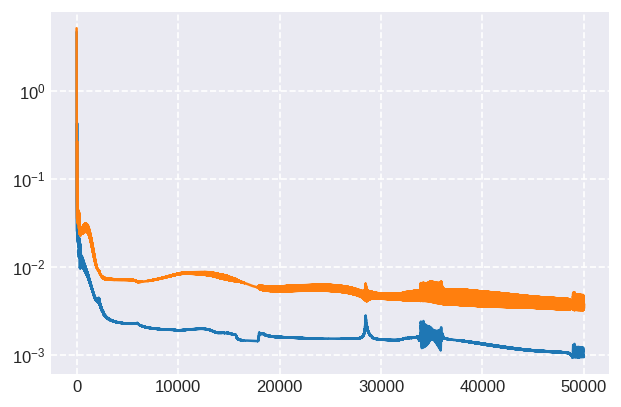

In [52]:
fig, ax = plt.subplots(dpi=120)
ax.set_yscale('log')
ax.grid(linestyle='--', linewidth=1)
ax.plot(range(len(ls2)),np.array(ls2))
ax.plot(range(len(es)),np.array(es))
# fig.savefig('prediction-01-l.jpg')

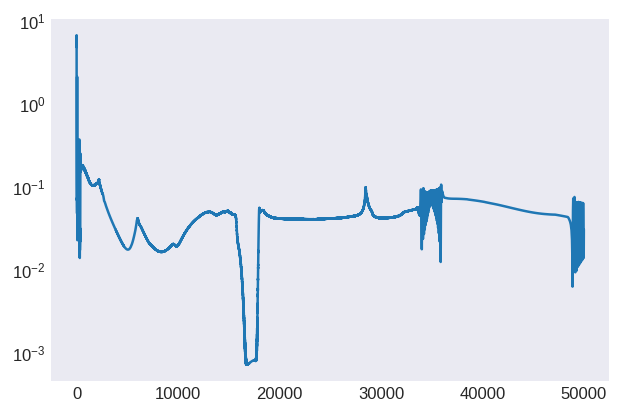

In [53]:
fig, ax = plt.subplots(dpi=120)
ax.set_yscale('log')
ax.plot(range(len(gs)),gs)
# fig.savefig('prediction-01-g.jpg')

<ipython-input-54-883e72673624>:5: RuntimeWarning: invalid value encountered in true_divide
  y_real = np.sin(x_lin)/x_lin


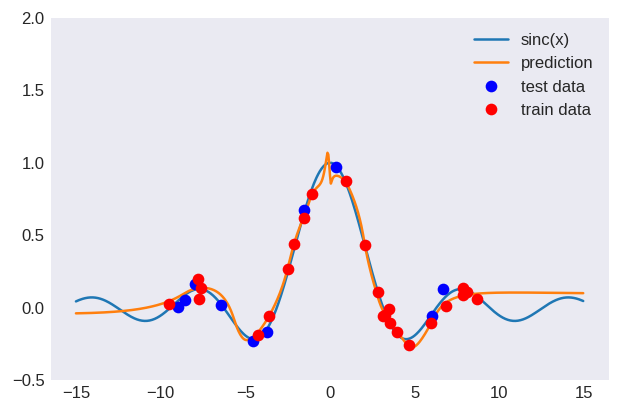

In [54]:
x_lin = range(-1500,1500,5)
x_lin = np.array(x_lin) / 100
y_pred = nn2.predict(x_lin)
y_pred = np.reshape(y_pred, -1)
y_real = np.sin(x_lin)/x_lin

fig, ax = plt.subplots(dpi=120)
ax.set_ylim(-0.5,2)
ax.plot(x_lin, y_real, label='sinc(x)')
ax.plot(x_lin, y_pred, label='prediction')
ax.plot(x_test, y_test, 'bo', label='test data')
ax.plot(x_train, y_train, 'ro', label='train data')
ax.plot()
ax.legend()
# fig.savefig("prediction-01.jpg")

/home/wimmerth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


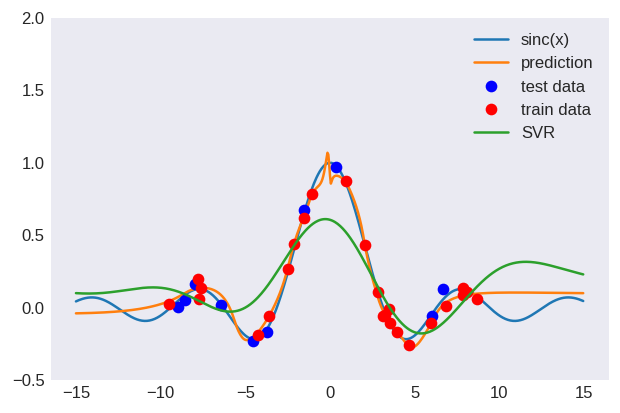

In [55]:
from sklearn.svm import SVR
svr = SVR()
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_lin = x_lin.reshape(-1,1)
svr.fit(x_train,y_train)
ax.plot(x_lin,svr.predict(x_lin),label='SVR')
ax.legend()
fig